In [2]:
#install.packages("emmeans")
library(DHARMa)
library(lindia)
library(tidyverse)
library(caret)
library(leaps)
library(MASS)
library(modEvA)
library(dplyr)
library(lme4) #random effect
library(broom)
library(ggpubr) 
library(rstatix)
library(WRS2) #robust ancova
library(lmerTest) #like lmer but with p-value
library(emmeans) #visualize interaction term

#levenetest
library(car)

library(rstanarm) #r2 in mixed effect models
library(performance) #r2 in mixed effect models

This is DHARMa 0.3.3.0. For overview type '?DHARMa'. For recent changes, type news(package = 'DHARMa') Note: Syntax of plotResiduals has changed in 0.3.0, see ?plotResiduals for details

-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.3.3     v purrr   0.3.4
v tibble  3.0.6     v dplyr   1.0.3
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.1

-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Loading required package: lattice


Attaching package: 'caret'


The following object is masked from 'package:purrr':

    lift



Attaching package: 'MASS'


The following object is masked from 'package:dplyr':

    select


Loading required package: Matrix


Attaching package: 'Matrix'


The following objects are masked from 'package:tidyr':



In [40]:
path_ = 'G:/VPHI/Welfare/2- Research Projects/OFHE2.OriginsE2/DataOutput/TrackingSystem/correctlightschedule_/visual/Treatment&Classs/adaptability'
df = read.csv(file.path(path_,'STATweight_1rowperweight_allhensalltime.csv'), header = TRUE, sep = ";")
df$Treatment = as.factor(df$Treatment)  
df$PenID = as.factor(df$PenID)
df$HenID = as.factor(df$HenID)
df$variable = as.factor(df$variable)
name = 'firsttry'
print(dim(df))
summary(df)
head(df, 3)

[1] 336  10


       X              HenID     Treatment      PenID       CLASS          
 Min.   :  0.00   hen_1  :  3   OFH :159   10     :51   Length:336        
 1st Qu.: 83.75   hen_10 :  3   TRAN:177   3      :45   Class :character  
 Median :167.50   hen_101:  3              12     :45   Mode  :character  
 Mean   :167.50   hen_102:  3              4      :42                     
 3rd Qu.:251.25   hen_103:  3              9      :42                     
 Max.   :335.00   hen_104:  3              5      :39                     
                  (Other):318              (Other):72                     
   is_MEXP              R.Pen       InitialStartDate                variable  
 Length:336         Min.   :1.000   Length:336         10-12 juin weight:112  
 Class :character   1st Qu.:2.000   Class :character   29-09 weight     :112  
 Mode  :character   Median :2.000   Mode  :character   weight 23-11-2020:112  
                    Mean   :2.473                                             
     

,X,HenID,Treatment,PenID,CLASS,is_MEXP,R.Pen,InitialStartDate,variable,value
,<int>,<fct>,<fct>,<fct>,<chr>,<chr>,<dbl>,<chr>,<fct>,<dbl>
1,0,hen_1,OFH,9,EPI,False,1,2020-06-10,29-09 weight,1134
2,1,hen_10,OFH,11,LEXP,False,1,2020-06-10,29-09 weight,1070
3,2,hen_101,OFH,5,MEXP,True,3,2020-06-10,29-09 weight,1082


In [82]:
#does not converge with: (1|PenID/henID2)
fit = lmer(value ~ variable*is_MEXP + variable*Treatment + (1|PenID/HenID) +(1|variable), data=df) #+ (1|R.Pen)
#capture.output(summary(fit), file=file.path(path_,paste(name,'.txt', sep='')), append=TRUE)
summary(fit)

Warning message:
"Model failed to converge with 1 negative eigenvalue: -5.5e-08"


Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
value ~ variable * is_MEXP + variable * Treatment + (1 | PenID/HenID) +  
    (1 | variable)
   Data: df

REML criterion at convergence: 3741.3

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.4407 -0.4880  0.0011  0.4487  2.6717 

Random effects:
 Groups      Name        Variance  Std.Dev.
 HenID:PenID (Intercept)    1304.6   36.12 
 PenID       (Intercept)     260.7   16.15 
 variable    (Intercept) 1562879.6 1250.15 
 Residual                   3824.1   61.84 
Number of obs: 336, groups:  HenID:PenID, 112; PenID, 8; variable, 3

Fixed effects:
                                         Estimate Std. Error        df t value
(Intercept)                               64.8439  1250.2263  218.0134   0.052
variable29-09 weight                    1109.5459  1768.0325  217.9768   0.628
variableweight 23-11-2020               1635.4403  1768.0325  217.9765   0.925
is_MEXPTrue         

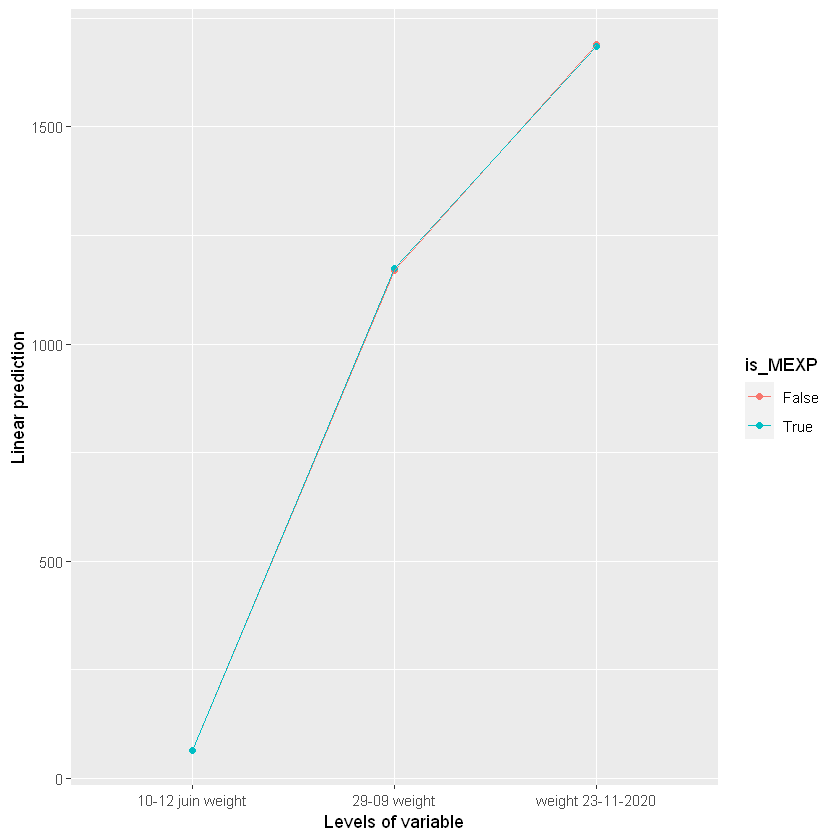

In [83]:
emmip(fit, is_MEXP ~ variable)

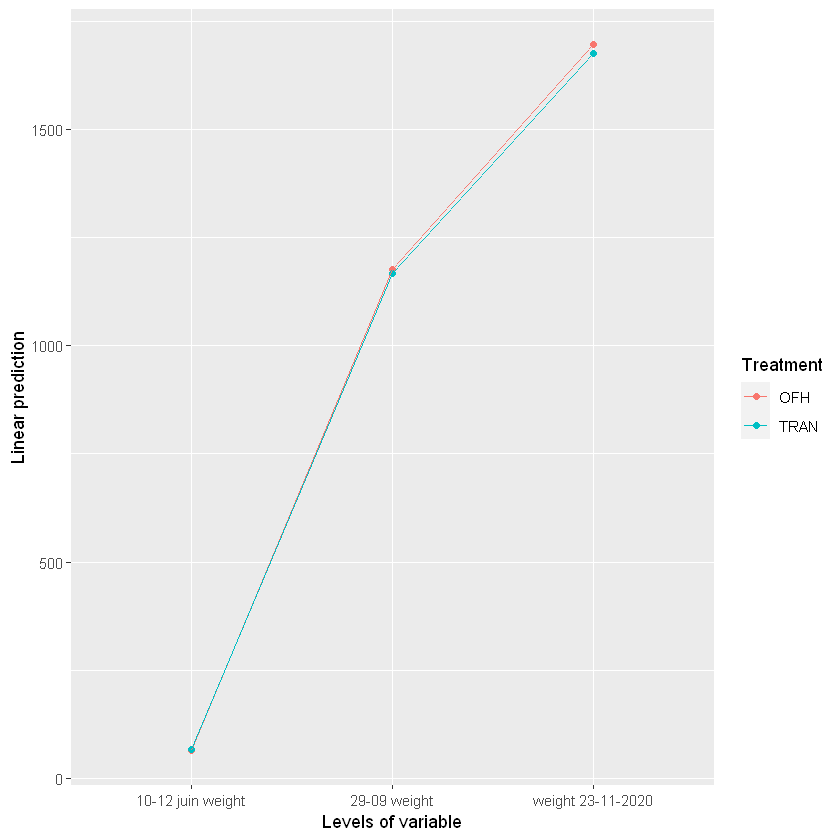

In [84]:
emmip(fit, Treatment ~ variable)

path_ = 'G:/VPHI/Welfare/2- Research Projects/OFHE2.OriginsE2/DataOutput/TrackingSystem/correctlightschedule_/visual/Treatment&Classs/adaptability'
df = read.csv(file.path(path_,'STATweight.csv'), header = TRUE, sep = ";")
#df$SQRTPercentagenotmoving <- sqrt(df$Percentagenotmoving)
df$Treatment = as.factor(df$Treatment)  
df$PenID = as.factor(df$PenID)
df$HenID = as.factor(df$HenID)
name = 'firsttry'
print(dim(df))
summary(df)
head(df, 3)

#does not converge with: (1|PenID/henID2)
fit = lmer(X10.12.juin.weight ~ is_MEXP + Treatment + (1|PenID)+ (1|R.Pen), data=df)
#capture.output(summary(fit), file=file.path(path_,paste(name,'.txt', sep='')), append=TRUE)
summary(fit)

#does not converge with: (1|PenID/henID2)
fit = lmer(X29.09.weight ~ is_MEXP + Treatment + (1|PenID)+ (1|R.Pen), data=df)
#capture.output(summary(fit), file=file.path(path_,paste(name,'.txt', sep='')), append=TRUE)
summary(fit)

#does not converge with: (1|PenID/henID2)
fit = lmer(weight.23.11.2020 ~ is_MEXP + Treatment + (1|PenID)+ (1|R.Pen), data=df)
#capture.output(summary(fit), file=file.path(path_,paste(name,'.txt', sep='')), append=TRUE)
summary(fit)

In [85]:
Anova(fit)

,Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>
variable,8.788804e-01,2,0.6443971
is_MEXP,1.299209e-05,1,0.9971241
Treatment,4.702822e-01,1,0.4928574
variable:is_MEXP,3.976847e-01,2,0.8196791
variable:Treatment,1.691387e+00,2,0.4292596


In [86]:
#rand: Likelihood Ratio Test On Random Effects Of Linear Mixed Effects Model
#tests the hypothesis that the random effect variation is significant versus the null that there is no between group-level 
#variation
rand(fit)

Warning message in checkConv(attr(opt, "derivs"), opt$par, ctrl = control$checkConv, :
"unable to evaluate scaled gradient"
Warning message in checkConv(attr(opt, "derivs"), opt$par, ctrl = control$checkConv, :
"Model failed to converge: degenerate  Hessian with 1 negative eigenvalues"
Warning message:
"Model failed to converge with 1 negative eigenvalue: -5.5e-08"


,npar,logLik,AIC,LRT,Df,Pr(>Chisq)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,13,-1870.648,3767.297,NA,NA,NA
(1 | HenID:PenID),12,-1879.902,3783.803,1.850666e+01,1,1.693115e-05
(1 | PenID),12,-1871.839,3767.678,2.381221e+00,1,1.228015e-01
(1 | variable),12,-1870.648,3765.297,-1.310582e-09,1,1.000000e+00


In [87]:
ranef(fit)

$`HenID:PenID`
           (Intercept)
hen_1:9     -7.2967428
hen_10:11  -42.6372530
hen_101:5  -34.9788627
hen_102:3   19.7504882
hen_103:3   30.4246058
hen_104:3   -9.0108201
hen_105:9  -40.6625863
hen_106:9  -11.1763001
hen_108:11  -9.8952277
hen_109:5  -35.3497816
hen_110:9   52.1851652
hen_111:11 -43.2779311
hen_113:9    6.3092378
hen_114:9   -6.6729246
hen_12:5    23.5100766
hen_123:4  -11.2380498
hen_126:8   22.2762513
hen_13:3   -45.8498136
hen_131:10  17.8692093
hen_133:12  24.7945114
hen_134:10 -23.3551400
hen_135:12  18.7249289
hen_136:8   29.6760014
hen_137:12 -20.4575978
hen_138:10  45.9223996
hen_139:10  52.1286302
hen_140:10  36.7692146
hen_141:10   8.0735776
hen_142:4  -14.0873816
hen_143:10 -40.4005507
hen_144:4    5.8393123
hen_145:10  -3.7621081
hen_146:8   -9.6059165
hen_147:8  -10.8721814
hen_149:12 -24.1667870
hen_150:4   10.8653462
hen_151:8  -17.9702208
hen_153:4  -47.2189543
hen_154:12 -18.8541339
hen_155:12  48.3496317
hen_158:8   -4.7520191
hen_159:12   8.6107

In [88]:
confint(fit)

Computing profile confidence intervals ...



,2.5 %,97.5 %
.sig01,25.99224,46.83890
.sig02,0.00000,30.15717
.sig03,0.00000,11.27270
.sigma,55.76451,67.12209
(Intercept),39.36363,90.28419
variable29-09 weight,1083.49789,1135.59389
variableweight 23-11-2020,1609.39229,1661.48830
is_MEXPTrue,-27.82021,28.32900
TreatmentTRAN,-32.65246,33.76850
variable29-09 weight:is_MEXPTrue,-28.83063,39.41586


# Assumptions

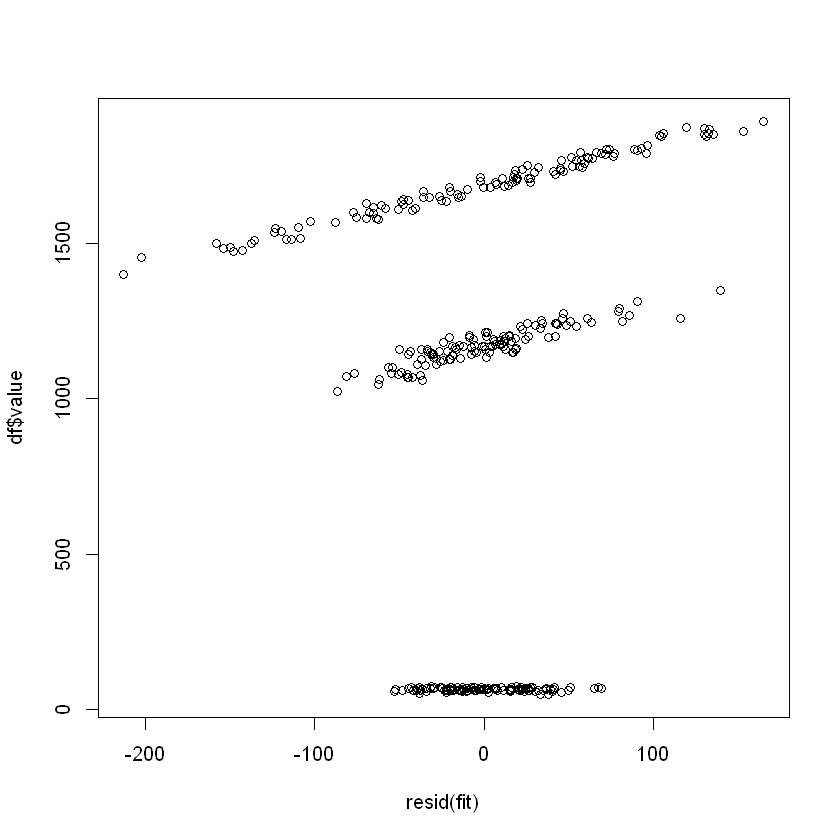

In [89]:
#linearity
#jpeg(file.path(path_, paste('diagnostic_plot_linearity_',name,'.jpg', sep='')))
plot(resid(fit), df$value)
#dev.off()

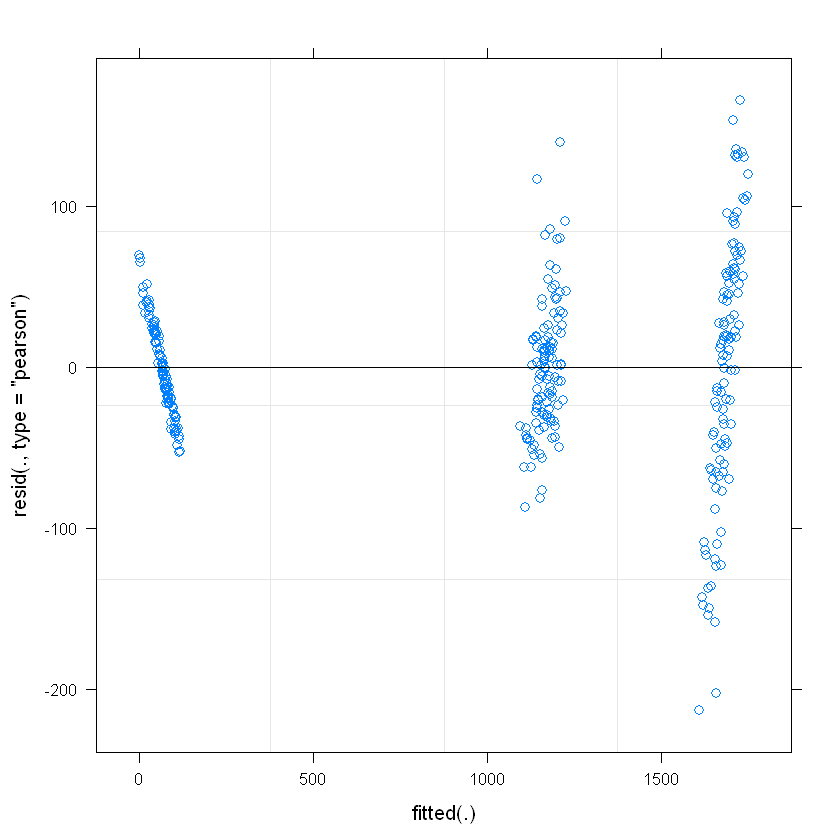

In [90]:
#check homogeneity of variance
#variance of the residuals is equal across groups
plot(fit)

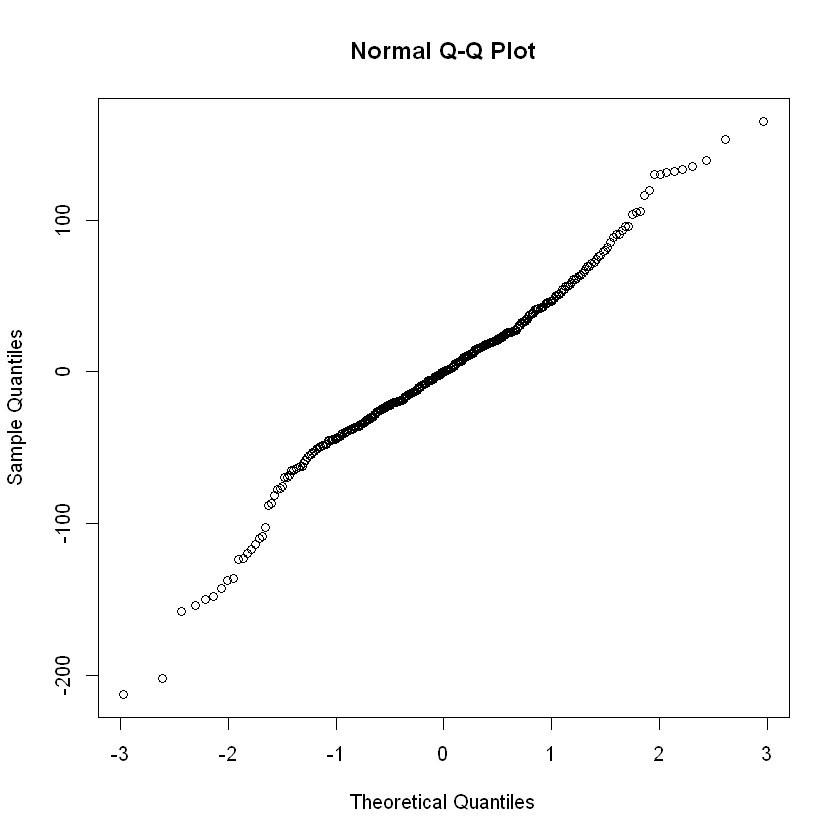

In [91]:
#normally distributed residuals
#qqmath(fit) #same
qqnorm(resid(fit))

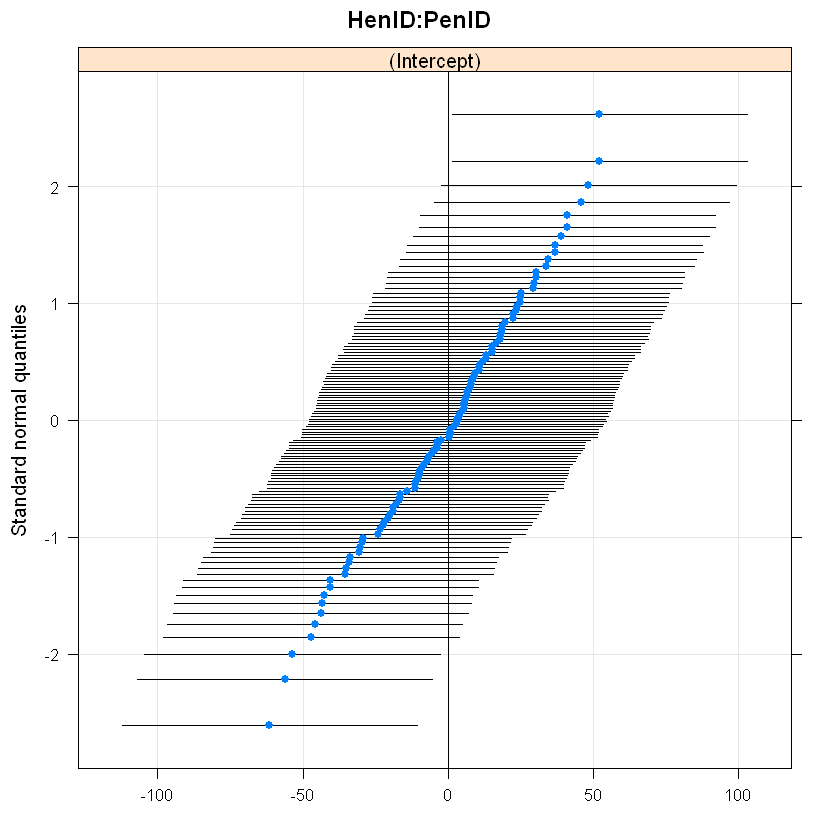

$`HenID:PenID`

$PenID

$variable


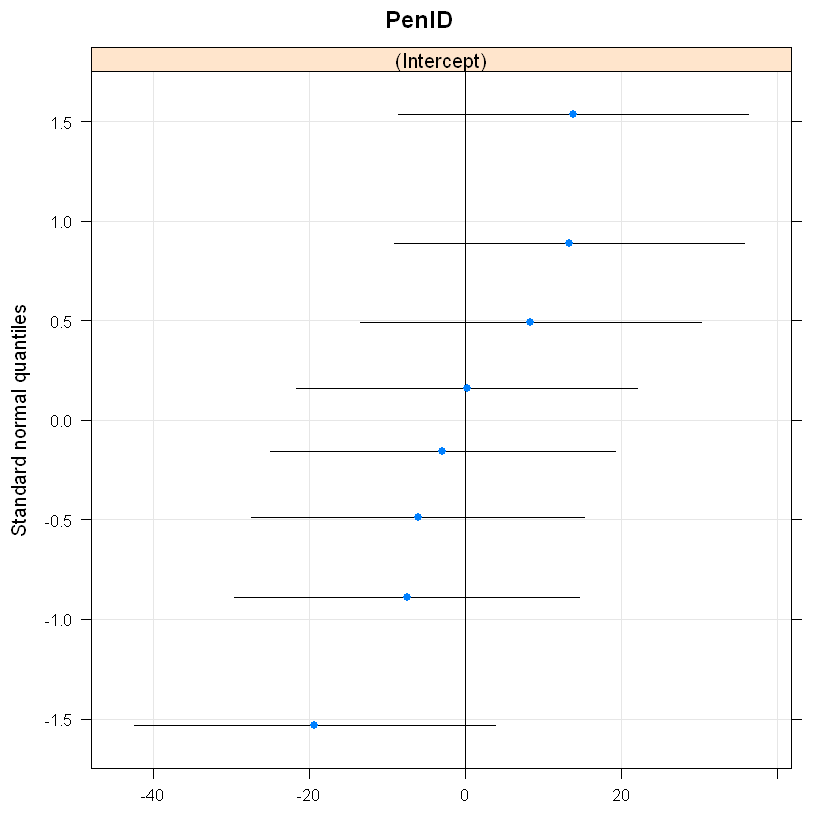

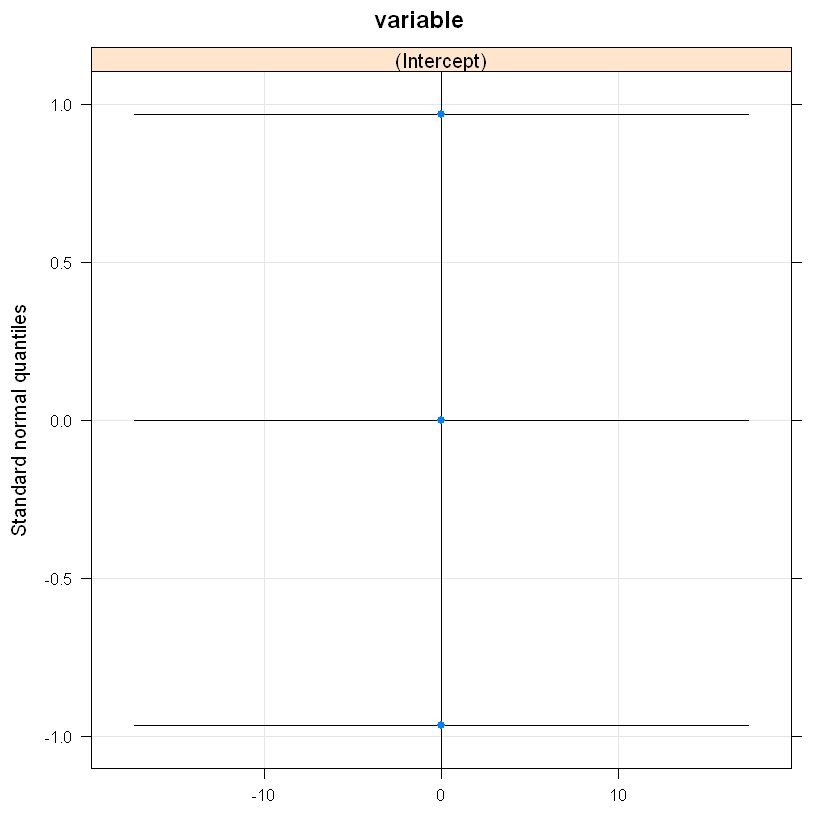

In [92]:
#qqplot
qqmath(ranef(fit))